In [38]:
import numpy as np
import pandas as pd

# Loading and preprocessing the Data

In [39]:
movie_data = pd.read_csv("movie.metadata.tsv", sep="\t", header=None, encoding='utf-8')

In [40]:
movie_data.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [41]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
0    81741 non-null int64
1    81741 non-null object
2    81741 non-null object
3    74839 non-null object
4    8401 non-null float64
5    61291 non-null float64
6    81741 non-null object
7    81741 non-null object
8    81741 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


### Converting the string objects in columns 6, 7, 8 to dictionary

In [42]:
import ast
movie_data[[6, 7, 8]] = movie_data[[6, 7, 8]].applymap(ast.literal_eval)

### Replacing the dictionary object with it's respective values

In [43]:
def replace_dicts(arg):
    return list(arg.values())

In [44]:
movie_data[[6, 7, 8]] = movie_data[[6, 7, 8]].applymap(replace_dicts)

In [45]:
movie_data.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


#### columns 6, 7 contain only a single element. So we take out the element from the list, and if it contains nothing, we replace it with null values

In [46]:
def take_element(arg):
    if len(arg) != 0:
        return arg[0]
    else:
        return np.nan

In [47]:
movie_data[[6, 7]] = movie_data[[6, 7]].applymap(take_element)

In [48]:
movie_data.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,[Drama]


### Replacing Empty Lists with null values

In [49]:
def remove_empty_lists(genre_list):
    if len(genre_list) == 0:
        return np.nan
    else:
        return genre_list

In [50]:
movie_data[8] = movie_data[8].apply(remove_empty_lists)

In [51]:
movie_data.dropna(subset=[8], inplace=True)

### loading and mapping the plot summaries based on the wikipedia movie ID

In [52]:
indices = []
summaries = []

import re
pattern = re.compile(r"\t")

In [53]:
with open("plot_summaries.txt", 'r') as f:
    for line in f:
        Id, summary = re.split(pattern, line)
        indices.append(Id)
        summaries.append(summary)

In [54]:
indices = np.asarray(indices, dtype=np.int32)

In [55]:
plot_column = pd.Series(index=indices, data=summaries)

In [56]:
movie_data_new = movie_data.copy()

In [57]:
movie_data_new = movie_data_new.set_index(0)

In [58]:
movie_data_new["plot"] = plot_column

In [59]:
movie_data_new = movie_data_new.reset_index()

In [60]:
movie_data_new.head()

,0,1,2,3,4,5,6,7,8,plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"[Crime Fiction, Drama]",NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,[Drama],"Eva, an upper class housewife, becomes frustra..."


### Removing the uneccessary columns and renaming the rest

In [61]:
movie_data_new = movie_data_new.drop([1, 4], axis=1)

In [62]:
movie_data_new.rename({0:"ID", 2:"movie_name", 3:"year_release", 5:"play_time", 6:"Language", \
                       7:"country", 8:"genre"}, axis=1, inplace=True)

In [63]:
movie_data_new.head()

,ID,movie_name,year_release,play_time,Language,country,genre,plot
0,975900,Ghosts of Mars,2001-08-24,98.0,English Language,United States of America,"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,English Language,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]",NaN
2,28463795,Brun bitter,1988,83.0,Norwegian Language,Norway,"[Crime Fiction, Drama]",NaN
3,9363483,White Of The Eye,1987,110.0,English Language,United Kingdom,"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
4,261236,A Woman in Flames,1983,106.0,German Language,Germany,[Drama],"Eva, an upper class housewife, becomes frustra..."


## Pre-processing the genres

In [64]:
movie_data_new["genre"].head()

0    [Thriller, Science Fiction, Horror, Adventure,...
1     [Mystery, Biographical film, Drama, Crime Drama]
2                               [Crime Fiction, Drama]
3    [Thriller, Erotic thriller, Psychological thri...
4                                              [Drama]
Name: genre, dtype: object

In [65]:
def split_genre(genre_list):
    '''splits the genres, eg., converts "Action Thriller" to ["Action", "Thriller"]'''
    genre_list_new = []
    for genre in genre_list:
        genre = genre.lower()
        genre = re.sub(r"\'s", "", genre)
        genre = re.sub(r"/", " ", genre)
        genre = re.sub(r"sci-fi", "sci fi", genre)
        genre = re.sub(r"fictionction", "fiction action", genre)
        genre = re.sub(r"coming of age", "coming-of-age", genre)
        genre = re.sub(r"movies", "movie", genre)
        genre = re.sub(r"comedy-drama", "comedy drama", genre)
        genre = re.sub(r"martial arts", "martial-arts", genre)
        genre = re.sub(r"hip hop", "hip-hop", genre)
        genre = re.sub(r" issues", "-issue", genre)
        genre = re.sub(r"time travel", "time-travel", genre)
        genre_list_new.extend(genre.split())
        
    return list(set(genre_list_new))

In [66]:
movie_data_new["genre"] = movie_data_new["genre"].apply(split_genre)

## ----- genre preprocessing -----

- biographical --> biography
- period --> history
- sci-fi --> [science, fiction]
- action/adventure --> [action, adventure]
- children's/family --> [children, family]
- sci --> science
- humour --> comedy
- fictional --> fiction
- fi --> fiction
- singing --> music
- comdedy --> comedy
- investing --> finance
- child --> children
- jukebox --> music
- computers --> science
- librarians --> libraries
- romantic --> romance
- scienceence --> science
- fictionction --> [fiction, action]
- coming of age --> coming-of-age
- warfare --> war
- childrenren --> children
- martial arts --> martial-arts
- biopic --> biography
- thrillers --> thriller
- gross-out --> gross
- fictionlms --> fiction
- fictionlmed --> fiction
- hip hop --> hip-hop

In [67]:
def clean_genre(genre_list):
    if "film" in genre_list:
        genre_list.remove("film")
    if "world" in genre_list:
        genre_list.remove("world")
    if "cinema" in genre_list:
        genre_list.remove("cinema")
    if "movie" in genre_list:
        genre_list.remove("movie")
    if "pictures" in genre_list:
        genre_list.remove("pictures")
    if "about" in genre_list:
        genre_list.remove("about")
    if "camera" in genre_list:
        genre_list.remove("camera")
    if "piece" in genre_list:
        genre_list.remove("piece")
    if "buddy" in genre_list:
        genre_list.remove("buddy")
    if "&" in genre_list:
        genre_list.remove("&")
    if "of" in genre_list:
        genre_list.remove("of")
    if "[feature]" in genre_list:
        genre_list.remove("[feature]")
    if "in" in genre_list:
        genre_list.remove("in")
    if "errors" in genre_list:
        genre_list.remove("errors")
    if "à" in genre_list:
        genre_list.remove("à")
    if "out" in genre_list:
        genre_list.remove("out")
    if "the" in genre_list:
        genre_list.remove("the")
    if "ii" in genre_list:
        genre_list.remove("ii")
    if "and" in genre_list:
        genre_list.remove("and")
    if "sword" in genre_list:
        genre_list.remove("sword")
    if "z" in genre_list:
        genre_list.remove("z")
    if "95" in genre_list:
        genre_list.remove("95")
    if "acid" in genre_list:
        genre_list.remove("acid")
    if "applied" in genre_list:
        genre_list.remove("applied")
    if "new" in genre_list:
        genre_list.remove("new")
    if "view" in genre_list:
        genre_list.remove("view")
        
    genre_list_new = []
    for genre in genre_list:
        genre = re.sub(r"biographical", "biography", genre)
        genre = re.sub(r"period", "history", genre)
        genre = re.sub(r"sci", "science", genre)
        genre = re.sub(r"humour", "comedy", genre)
        genre = re.sub(r"fi", "fiction", genre)
        genre = re.sub(r"fictional", "fiction", genre)
        genre = re.sub(r"singing", "music", genre)
        genre = re.sub(r"comdedy", "comedy", genre)
        genre = re.sub(r"child", "children", genre)
        genre = re.sub(r"computers", "science", genre)
        genre = re.sub(r"jukebox", "music", genre)
        genre = re.sub(r"librarians", "libraries", genre)
        genre = re.sub(r"investing", "finance", genre)
        genre = re.sub(r"romantic", "romance", genre)
        genre = re.sub(r"scienceence", "science", genre)
        genre = re.sub(r"warfare", "war", genre)
        genre = re.sub(r"fictionction", "fiction", genre)
        genre = re.sub(r"childrenren", "children", genre)
        genre = re.sub(r"biopic", "biography", genre)
        genre = re.sub(r"thrillers", "thriller", genre)
        genre = re.sub(r"gross-out", "gross", genre)
        genre = re.sub(r"fictionlms", "fiction", genre)
        genre = re.sub(r"fictionlmed", "fiction", genre)
        genre = re.sub(r"documentaries", "documentary", genre)
        genre = re.sub(r"documetary", "documentary", genre)
        genre = re.sub(r"comedies", "comedy", genre)
        genre = re.sub(r"family-oriented", "family", genre)
        genre = re.sub(r"innovations", "science", genre)
        genre = re.sub(r"inventions", "science", genre)
        genre = re.sub(r"arts", "art", genre)
        genre = re.sub(r"fictionlipino", "fiction", genre)
        genre = re.sub(r"fictional", "fiction", genre)
        genre = re.sub(r"children-issue", "children", genre)
        genre = re.sub(r"childrenhood", "children", genre)
        genre = re.sub(r"gender-issue", "lgbt", genre)
        genre = re.sub(r"anime", "animation", genre)
        genre = re.sub(r"cartoon", "animation", genre)
        genre = re.sub(r"b-western", "western", genre)
        genre = re.sub(r"social-issue", "social", genre)
        genre = re.sub(r"pinku", "melodrama", genre)
        genre = re.sub(r"road-horror", "horror", genre)
        genre = re.sub(r"heaven-can-wait", "heavenly", genre)
        genre = re.sub(r"psycho-biddy", "psychological", genre)
        genre = re.sub(r"fictiontness", "fiction", genre)
        genre = re.sub(r"fictionnance", "fiction", genre)
        genre = re.sub(r"children-issue", "children", genre)
        genre = re.sub(r"fictionlm-opera", "fiction", genre)
        genre = re.sub(r"bruceploitation", "exploitation", genre)
        genre = re.sub(r"therimin", "music", genre)
        genre = re.sub(r"c-movie", "b-movie", genre)
        genre_list_new.append(genre)
    
    return list(set(genre_list_new))

In [68]:
movie_data_new["genre"] = movie_data_new["genre"].apply(clean_genre)

### Further Preprocessing

Counting all the genres

In [69]:
genre_count = {}
for genres in movie_data_new["genre"].values:
    for genre in genres:
        if genre not in genre_count.keys():
            genre_count.update({genre: 1})
        else:
            genre_count[genre] += 1

In [70]:
len(genre_count)

308

In [71]:
# sorting the dictionary
from collections import OrderedDict
sorted_dict = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)
sorted_dict = OrderedDict(sorted_dict)

#### get similar words based on character pattern

In [72]:
from difflib import get_close_matches

In [73]:
print(get_close_matches("fiction", list(sorted_dict.keys())))

['fiction', 'action', 'addiction']


In [119]:
for word in list(sorted_dict.keys())[:10]:
    print("the close words to {} are: ".format(word))
    print(get_close_matches(word, list(sorted_dict.keys())))

the close words to drama are: 
['drama', 'melodrama']
the close words to comedy are: 
['comedy']
the close words to fiction are: 
['fiction', 'action', 'animation']
the close words to romance are: 
['romance']
the close words to action are: 
['action', 'fiction', 'animation']
the close words to thriller are: 
['thriller']
the close words to black-and-white are: 
['black-and-white']
the close words to adventure are: 
['adventure']
the close words to short are: 
['short', 'sports']
the close words to crime are: 
['crime']


### Grouping words based on their semantic meanings using word embeddings

In [75]:
import numpy as np
from sklearn.metrics import pairwise_distances

In [76]:
def cosine_dist(a, b):
    '''This function calculates the cosine distance between two vectors'''
    return 1 - (a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)))

In [77]:
glove_path = "glove.6B.100d.txt"

In [78]:
vocab_list = list(sorted_dict.keys())
top50_vocab_list = vocab_list[:50]
bottom_vocab_list = vocab_list[50:]

In [79]:
print("Loading word vectors only if they are in the vocab_list")
top50_word2vec = {}
bottom_word2vec = {}
top50_embedding = []
bottom_embedding = []
top50_idx2word = []
bottom_idx2word = []
with open(glove_path) as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        no_words = 0
        if word in top50_vocab_list:
            top50_word2vec[word] = vec
            top50_embedding.append(vec)
            top50_idx2word.append(word)
        elif word in bottom_vocab_list:
            bottom_word2vec[word] = vec
            bottom_embedding.append(vec)
            bottom_idx2word.append(word)
        else:
            no_words += 1
    print("found {} vectors in top50".format(len(top50_word2vec)))
    print("found {} words in bottom".format(len(bottom_word2vec)))
    top50_embedding = np.array(top50_embedding)
    bottom_embedding = np.array(bottom_embedding)
    top50_V, top50_D = top50_embedding.shape
    bottom_V, bottom_D = bottom_embedding.shape

Loading word vectors only if they are in the vocab_list
found 49 vectors in top50
found 258 words in bottom


In [80]:
genre_mapping = {}
def nearest_neighbors(bottom_word):
    if bottom_word not in bottom_word2vec:
        print("*****************     {} not in dictionary".format(bottom_word))
        return
    
    bottom_vec = bottom_word2vec[bottom_word]
    distances = pairwise_distances(bottom_vec.reshape(1, bottom_D), top50_embedding).reshape(top50_V)
    idx = distances.argsort()[0]
    print("{} --> {}".format(bottom_word, top50_idx2word[idx]))
    genre_mapping[bottom_word] = top50_idx2word[idx]

In [81]:
for bottom_word in bottom_vocab_list:
    nearest_neighbors(bottom_word)

costume --> parody
slapstick --> melodrama
art --> culture
b-movie --> slasher
spy --> thriller
social --> political
ensemble --> musical
gay --> lgbt
gangster --> slasher
docudrama --> melodrama
detective --> mystery
creature --> supernatural
themed --> adventure
erotic --> melodrama
road --> short
epic --> fantasy
sex --> teen
pornographic --> parody
erotica --> parody
superhero --> parody
concert --> musical
screwball --> melodrama
monster --> parody
disaster --> action
interest --> short
zombie --> slasher
manners --> satire
experimental --> science
courtroom --> silent
story --> mystery
computer --> science
adult --> teen
domestic --> action
propaganda --> parody
rockumentary --> coming-of-age
marriage --> romance
avant-garde --> indie
natural --> western
picture --> documentary
animal --> society
pre-code --> coming-of-age
heist --> melodrama
mockumentary --> parody
stop --> action
motion --> action
animated --> animation
christian --> culture
surrealism --> melodrama
prison --> 

In [82]:
# import json
# with open("data.json") as f:
#     genre_mapping = json.load(f)

#### using 50 genres because of memory error with 100

In [83]:
def genre_map(genre_list):
    genre_list_new = []
    for genre in genre_list:
        if genre in genre_mapping.values():
            genre_list_new.append(genre)
        elif genre in genre_mapping.keys():
            new_genre = genre_mapping[genre]
            genre_list_new.append(new_genre)
        else:
            genre_list_new.append(genre)
    return list(set(genre_list_new))

In [84]:
movie_data_new["genre"] = movie_data_new["genre"].apply(genre_map)

In [85]:
genre_count = {}
for genres in movie_data_new["genre"].values:
    for genre in genres:
        if genre not in genre_count.keys():
            genre_count.update({genre: 1})
        else:
            genre_count[genre] += 1

In [86]:
# sorting the dictionary
from collections import OrderedDict
sorted_dict = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)
sorted_dict = OrderedDict(sorted_dict)

In [87]:
# count plot of all the genres

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

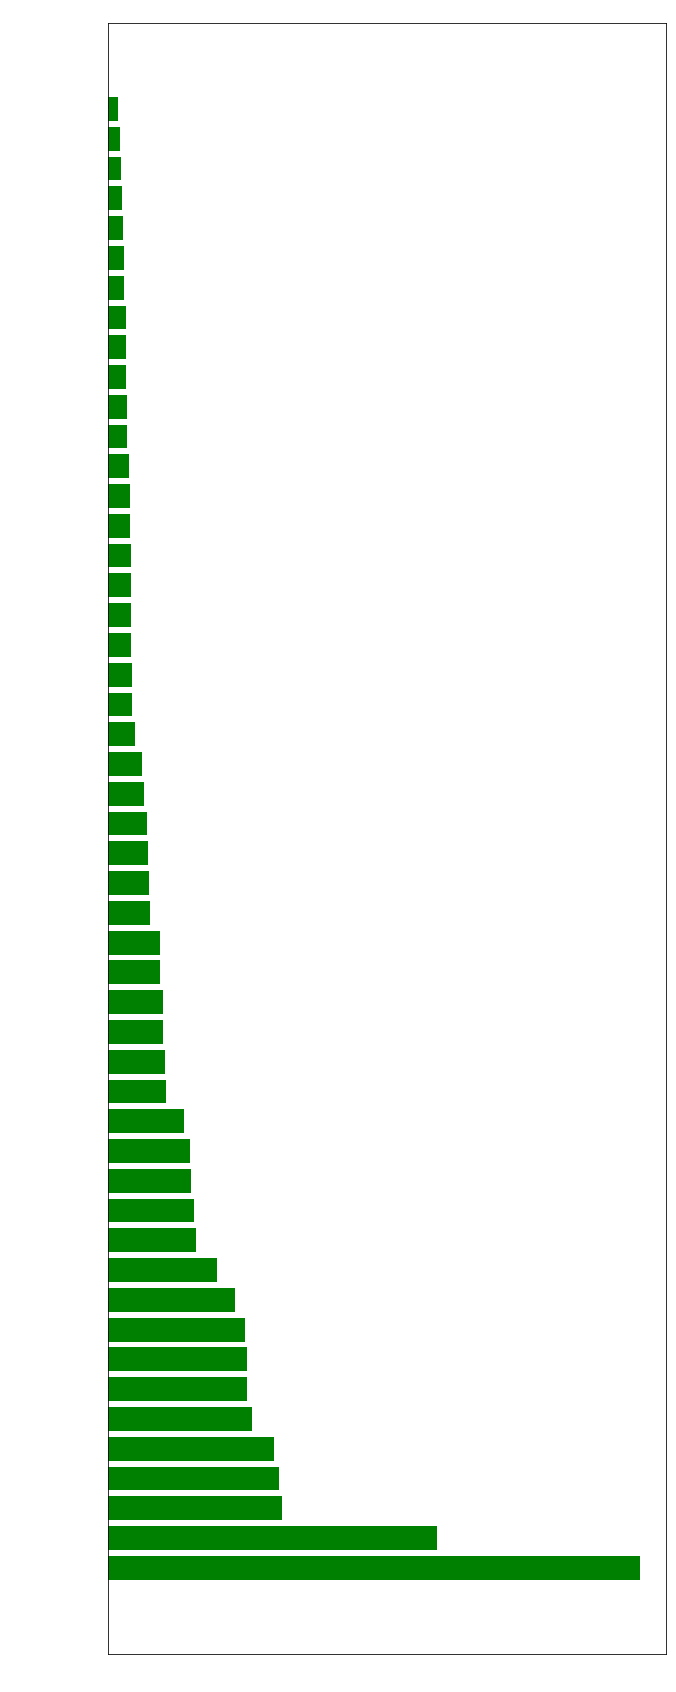

In [89]:

plt.figure(figsize=(10, 30))
plt.barh(list(sorted_dict.keys()), list(sorted_dict.values()), color='g')
plt.xlabel("Movie Genres", color="white")
plt.ylabel("Counts", color="white")
plt.title("Count Plot of Top 20 Movie Genres", color="white")
plt.show()

In [90]:
len(genre_count)

50

In [91]:
def remove_empty_lists(genre_list):
    if len(genre_list) == 0:
        return np.nan
    else:
        return genre_list

In [92]:
movie_data_new["genre"] = movie_data_new["genre"].apply(remove_empty_lists)

In [93]:
movie_data_new.dropna(subset=["genre", "plot"], inplace=True)

In [94]:
movie_data_new.head()

,ID,movie_name,year_release,play_time,Language,country,genre,plot
0,975900,Ghosts of Mars,2001-08-24,98.0,English Language,United States of America,"[supernatural, fiction, thriller, horror, west...","Set in the second half of the 22nd century, th..."
3,9363483,White Of The Eye,1987,110.0,English Language,United Kingdom,"[psychological, thriller, melodrama]",A series of murders of rich young women throug...
4,261236,A Woman in Flames,1983,106.0,German Language,Germany,[drama],"Eva, an upper class housewife, becomes frustra..."
6,18998739,The Sorcerer's Apprentice,2002,86.0,English Language,South Africa,"[fantasy, adventure, family]","Every hundred years, the evil Morgana returns..."
12,6631279,Little city,1997-04-04,93.0,English Language,United States of America,"[musical, romance, comedy, drama]","Adam, a San Francisco-based artist who works a..."


In [95]:
# remove \u00e0
def remove_u0(genre_list):
    if "\u00e0" in genre_list:
        genre_list.remove("\u00e0")
    return genre_list

movie_data_new["genre"] = movie_data_new["genre"].apply(remove_u0)

In [96]:
from sklearn.preprocessing import MultiLabelBinarizer

In [97]:
mlb = MultiLabelBinarizer()

In [98]:
genre_transformed = mlb.fit_transform(movie_data_new["genre"].values)

In [99]:
genre_new = pd.DataFrame(data=genre_transformed, columns=mlb.classes_)

In [100]:
genre_new.head()

,action,adaptation,adventure,animation,biography,black,black-and-white,bollywood,children,chinese,...,slasher,society,sports,supernatural,suspense,teen,television,thriller,war,western
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
movie_genre_data = pd.concat([movie_data_new, genre_new], axis=1)

In [102]:
movie_genre_data.head()

,ID,movie_name,year_release,play_time,Language,country,genre,plot,action,adaptation,...,slasher,society,sports,supernatural,suspense,teen,television,thriller,war,western
0,975900.0,Ghosts of Mars,2001-08-24,98.0,English Language,United States of America,"[supernatural, fiction, thriller, horror, west...","Set in the second half of the 22nd century, th...",1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9363483.0,White Of The Eye,1987,110.0,English Language,United Kingdom,"[psychological, thriller, melodrama]",A series of murders of rich young women throug...,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,261236.0,A Woman in Flames,1983,106.0,German Language,Germany,[drama],"Eva, an upper class housewife, becomes frustra...",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Removing the null values and using only the 'plot' attribute to predict the genres

In [103]:
movie_plot_label = movie_genre_data.copy()

In [104]:
movie_plot_label = movie_plot_label.drop(["ID", "movie_name", "year_release", "play_time", "Language", "country", \
                       "genre"], axis=1)

In [105]:
movie_plot_label.dropna(inplace=True)

In [106]:
movie_plot_label.head()

,plot,action,adaptation,adventure,animation,biography,black,black-and-white,bollywood,children,...,slasher,society,sports,supernatural,suspense,teen,television,thriller,war,western
0,"Set in the second half of the 22nd century, th...",1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,A series of murders of rich young women throug...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Eva, an upper class housewife, becomes frustra...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"Every hundred years, the evil Morgana returns...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,"Adam, a San Francisco-based artist who works a...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cleaning the movie plots

In [107]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [108]:
# cleaning the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [109]:
movie_plot_label["plot"] = movie_plot_label["plot"].apply(clean_text)

### Removing Stop Words

In [110]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/neeraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
stop_words = set(stopwords.words('english'))

In [112]:
# adding some extra words to the stop words
stop_words.update(['zero','one','two','three','four','five',\
                   'six','seven','eight','nine','ten','may','also','across',\
                   'among','beside','however','yet','within'])

In [113]:
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [114]:
movie_plot_label["plot"] = movie_plot_label["plot"].apply(removeStopWords)

### Stemming

In [115]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [116]:
movie_plot_label["plot"] = movie_plot_label["plot"].apply(stemming)

### TF-IDF

In [117]:
movie_plot_label.shape

(21943, 51)

In [118]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(movie_plot_label, random_state=42, test_size=0.30, shuffle=True)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word',  norm='l2', max_features=1000, ngram_range=(1, 3))
train_text = train["plot"]
test_text = test["plot"]
vectorizer.fit(movie_plot_label["plot"])

x_train = vectorizer.transform(train_text)
y_train = train.drop(["plot"], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(["plot"], axis=1)

## Metrics

In [109]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

## One vs Rest

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

LogReg_pipeline.fit(x_train, y_train)

/home/neeraj/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [111]:
import pickle

# save the model to disk
filename = "logreg_model.sav"
pickle.dump(LogReg_pipeline, open(filename, 'wb'))

# load the model from disk
loaded_logreg_model = pickle.load(open(filename, 'rb'))

In [112]:
threshold = 0.2
probability_predicts = loaded_logreg_model.predict_proba(x_test)

In [113]:
predictions = np.asarray(probability_predicts > threshold, dtype=np.int32)
print("f1 score: {}".format(f1_score(y_test, predictions, average='micro')))
print("recall score: {}".format(recall_score(y_test, predictions, average='micro')))
print("precision score: {}".format(precision_score(y_test, predictions, average="micro")))

f1 score: 0.2930504916583802
recall score: 0.29649005141962886
precision score: 0.2896898208824814


## Batching the data because of huge memory

In [ ]:
def batch_generator(x_train, y_train, batch_size):
    start_idx = 0
    for i in range(0, x_train.shape[0]-batch_size, batch_size):
        x_train_partial = x_train[start_idx: start_idx + batch_size]
        y_train_partial = y_train[start_idx: start_idx + batch_size]
        yield x_train, y_train
        start_idx += batch_size

In [ ]:
batch_generator = batch_generator(x_train, x_test, 1000)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier

clf = MultiOutputClassifier(MultinomialNB())
clf.partial_fit(x_train[:10], y_train[:10], classes=[[0, 1]] * len(y_test.columns))
for x_train_p, y_train_p in batch_generator:
    clf.partial_fit(x_train_p, y_train_p)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

accuracy_list = []

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

categories = list(y_train.columns)
for category in categories:
    print('**Processing {} genre...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    accuracy_list.append(accuracy_score(test[category], prediction))
    print("\n")
    
print("The Average Accuracy is {}".format(np.mean(accuracy_list)))

**Processing action genre...**
Test accuracy is 0.8177122892298344


**Processing adaptation genre...**
Test accuracy is 0.972049217681908


**Processing adventure genre...**
Test accuracy is 0.8360929667324928


**Processing animation genre...**
Test accuracy is 0.9345283305483822


**Processing biography genre...**
Test accuracy is 0.9725049369588333


**Processing black genre...**
Test accuracy is 0.9782773811332219


**Processing black-and-white genre...**
Test accuracy is 0.9041470454200212


**Processing bollywood genre...**
Test accuracy is 0.9752392526203858


**Processing children genre...**
Test accuracy is 0.9726568433844751


**Processing chinese genre...**
Test accuracy is 0.975846878322953


**Processing comedy genre...**
Test accuracy is 0.6814522254291356


**Processing coming-of-age genre...**
Test accuracy is 0.9740240012152515


**Processing crime genre...**
Test accuracy is 0.8754367309737202


**Processing cult genre...**
Test accuracy is 0.9810116967947744


**Pro

## binary relevance

In [114]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# save the model to disk
filename = "naiveb_model.sav"
pickle.dump(classifier, open(filename, 'wb'))

# load the model from disk
loaded_naiveb_model = pickle.load(open(filename, 'rb'))


In [115]:
predictions = loaded_naiveb_model.predict(x_test)

In [116]:
print("f1 score: {}".format(f1_score(y_test, predictions, average='micro')))
print("recall score: {}".format(recall_score(y_test, predictions, average='micro')))
print("precision score: {}".format(precision_score(y_test, predictions, average="micro")))

f1 score: 0.13059101931111047
recall score: 0.3997317236753856
precision score: 0.07804384073469459


## Label Powerset

In [117]:
from skmultilearn.problem_transform import LabelPowerset

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# save the model to disk
filename = "lplogregress_model.sav"
pickle.dump(classifier, open(filename, 'wb'))

# load the model from disk
loaded_lb_loreg_model = pickle.load(open(filename, 'rb'))

In [118]:
predictions = loaded_lb_loreg_model.predict(x_test)

In [119]:
print("f1 score: {}".format(f1_score(y_test, predictions, average='micro')))
print("recall score: {}".format(recall_score(y_test, predictions, average='micro')))
print("precision score: {}".format(precision_score(y_test, predictions, average="micro")))

f1 score: 0.20566349731293923
recall score: 0.1334674714956405
precision score: 0.4479963980189104


## classifier chains

In [120]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# save the model to disk
filename = "chain_logregress.sav"
pickle.dump(classifier, open(filename, 'wb'))

# load the model from disk
loaded_chain_model = pickle.load(open(filename, 'rb'))

In [121]:
predictions = loaded_chain_model.predict(x_test)

In [122]:
print("f1 score: {}".format(f1_score(y_test, predictions, average='micro')))
print("recall score: {}".format(recall_score(y_test, predictions, average='micro')))
print("precision score: {}".format(precision_score(y_test, predictions, average="micro")))

f1 score: 0.17483376698467767
recall score: 0.10816007154035323
precision score: 0.4558130770680234
